In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import datetime
import time
import predict
import base
import shop_classify as sc

import matplotlib
myfont = matplotlib.font_manager.FontProperties(fname=r'C:/Windows/Fonts/msyh.ttf')
matplotlib.use('qt4agg')  
#指定默认字体  
matplotlib.rcParams['font.sans-serif'] = ['SimHei']   
matplotlib.rcParams['font.family']='sans-serif'  
#解决负号'-'显示为方块的问题  
matplotlib.rcParams['axes.unicode_minus'] = False 

%load_ext autoreload
%autoreload 2

C:\Program Files\Anaconda3\lib\site-packages\matplotlib\__init__.py:1357: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [2]:
#读取休假表
calenders = base.ReadCalendarCSV();
#读取user_pay_count
user_pay_counts = base.ReadUserPayCountCSV();
###读取商家信息
shop_infos = base.ReadShopInfoCSV();
##读取城市名称对照表
city_names = base.ReadCityNameCSV();
#读取开店时间数据
shop_open_dates = base.ReadShopOpenDateCSV();

In [3]:
%reload_ext autoreload

In [4]:
#ARIMA

In [6]:
sc.initCheckArimasData(shop_open_dates, user_pay_counts, calenders, pd.to_datetime('2016-7-25'), pd.to_datetime('2016-8-14'))

1
2
3
4
5
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0]
[0]
[0]
[11]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[135]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0]
[0]
[0]
[11]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[135]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0 0 0 0]
[0 0 0 0]
[0 0 0 0]
[146 150 131   0]
[0]
[0]
[0]
[11]
[0]
[0]
[0]
[1]
[0]
[0]
[0]
[0]
[135]
6
[61]
[60]
[80 61 45 46]
[80 61 45 46]
[80 61 45 46]
[80 61 45 46]
[60]
[61]
[60]
[80 61 45 46]
[80 61 45 46]
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
[0 0 0 0]
[260 244 250   0]
[0 0 0 0]
[260

In [ ]:
#执行ArimaShopClassify_Check.R

In [3]:
arima_prediction_df = pd.read_csv("./data/dataset/dataset/shop_classify/check/arima_prediction.txt", sep="\t", encoding='UTF-8', index_col=0)
arima_prediction_df = predict.FixFinalPredict(arima_prediction_df)

In [4]:
def initMeanData(week_num, first_start, fitst_end, second_start, second_end, pred_valid=True):
    time_ranges = sc.initWeekDate(pd.to_datetime('2016-7-25'), week_num)
    print(time_ranges)
    shop_mean_dict = sc.calculateHolidayMeansData(shop_open_dates, user_pay_counts, calenders, time_ranges)
    start_time = pd.to_datetime('2016-8-15')
    end_time = pd.to_datetime('2016-8-21')
    predict_date = pd.date_range(start=start_time, end=end_time, freq='D', normalize=True)
    pridicts = {}
    shop_pred_dict = {}
    for id in range(1, 2001):
        print(id)
        y_Pred = []
        pred_dict = {}
        for date in predict_date:
            daytype = calenders.loc[date.strftime('%Y-%m-%d')]['daytype']
            count = sc.getHolidayMeanCount(id, daytype, shop_mean_dict, first_start, fitst_end)
            y_Pred.append(count);
            pred_dict[daytype] = count;

        shop_pred_dict[id] = pred_dict;
        pridicts[id] = y_Pred

    start_time = pd.to_datetime('2016-8-22')
    end_time = pd.to_datetime('2016-8-28')
    predict_date = pd.date_range(start=start_time, end=end_time, freq='D', normalize=True)
    for id in range(1, 2001):
        print(id)
        y_Pred = []
        for date in predict_date:
            daytype = calenders.loc[date.strftime('%Y-%m-%d')]['daytype']
            #count = sc.getHolidayMeanCount(id, daytype, shop_mean_dict, 0, 3)
            if pred_valid == True:
                count = sc.getHolidayMeanCount(id, daytype, shop_mean_dict, second_start, second_end, shop_pred_dict)
            else:
                count = sc.getHolidayMeanCount(id, daytype, shop_mean_dict, second_start, second_end)
            pridicts[id].append(count)
    
    pridict_df = pd.DataFrame(pridicts)
    pridict_df = pridict_df.T
    pridict_df = predict.FixFinalPredict(pridict_df)
    return pridict_df;

In [5]:
mean_3_3_3_predict = initMeanData(3, 0, 3, 0, 3, False)
mean_3_3_2_predict = initMeanData(3, 0, 3, 1, 3)
mean_3_3_1_predict = initMeanData(3, 0, 3, 2, 3)
mean_2_2_2_predict = initMeanData(2, 0, 2, 0, 2, False)
mean_2_2_1_predict = initMeanData(2, 0, 2, 1, 2)

[[Timestamp('2016-07-25 00:00:00'), Timestamp('2016-07-31 00:00:00')], [Timestamp('2016-08-01 00:00:00'), Timestamp('2016-08-07 00:00:00')], [Timestamp('2016-08-08 00:00:00'), Timestamp('2016-08-14 00:00:00')]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
2

In [7]:
names = ["2_2_1", '2_2_2', '3_3_1', '3_3_2', '3_3_3', 'arima']

In [14]:

start_time = pd.to_datetime('2016-8-15')
end_time = pd.to_datetime('2016-8-28')
# mean_3_3_1_evaluations = {}
# mean_3_3_2_evaluations = {}
# mean_2_2_2_evaluations = {}
# mean_2_2_1_evaluations = {}

predict_dfs = [mean_2_2_1_predict, mean_2_2_2_predict, mean_3_3_1_predict, mean_3_3_2_predict, mean_3_3_3_predict, arima_prediction_df]
mean_evaluations = [{}, {}, {}, {},{},{}]

for id in range(1, 2001):
    y_Test = base.getTestCount(user_pay_counts, id, start_time, end_time).values
    for i in range(len(names)):
        df = predict_dfs[i]
        y_Pred = df.loc[id].values
        e = base.evaluation(y_Test, y_Pred)
        print("id=%d evaluation=%f"%(id, e))
        mean_evaluations[i][id] = e

id=1 evaluation=0.079277
id=1 evaluation=0.069411
id=1 evaluation=0.053455
id=1 evaluation=0.066046
id=1 evaluation=0.057791
id=1 evaluation=0.049549
id=2 evaluation=0.081822
id=2 evaluation=0.070370
id=2 evaluation=0.080308
id=2 evaluation=0.072603
id=2 evaluation=0.059848
id=2 evaluation=0.095448
id=3 evaluation=0.120598
id=3 evaluation=0.113752
id=3 evaluation=0.096717
id=3 evaluation=0.103562
id=3 evaluation=0.100606
id=3 evaluation=0.092331
id=4 evaluation=0.077089
id=4 evaluation=0.069427
id=4 evaluation=0.056910
id=4 evaluation=0.064143
id=4 evaluation=0.062596
id=4 evaluation=0.391104
id=5 evaluation=1.000000
id=5 evaluation=1.000000
id=5 evaluation=1.000000
id=5 evaluation=1.000000
id=5 evaluation=1.000000
id=5 evaluation=1.000000
id=6 evaluation=0.140081
id=6 evaluation=0.139987
id=6 evaluation=0.132008
id=6 evaluation=0.125632
id=6 evaluation=0.122522
id=6 evaluation=0.201357
id=7 evaluation=0.100102
id=7 evaluation=0.102450
id=7 evaluation=0.102254
id=7 evaluation=0.068547


In [11]:
mean_evaluation_dfs = []
for i in range(len(names)):
    mean_evaluation_df = pd.DataFrame.from_dict(mean_evaluations[i], orient='index');
    mean_evaluation_df = mean_evaluation_df.rename(columns={0:'evaluation'})
    print(mean_evaluation_df)
    mean_evaluation_df.index.name = 'id'
    mean_evaluation_df['evaluation'].mean()
    mean_evaluation_dfs.append(mean_evaluation_df)

      evaluation
1       0.079277
2       0.081822
3       0.120598
4       0.077089
5       1.000000
6       0.140081
7       0.100102
8       0.124831
9       0.072198
10      0.386447
11      0.072085
12      0.057145
13      0.140481
14      0.109749
15      0.066154
16      0.172301
17      0.101718
18      0.741592
19      0.055877
20      0.108579
21      0.216966
22      0.080836
23      0.054651
24      0.256855
25      0.158985
26      0.229021
27      0.081419
28      0.569160
29      0.115949
30      0.367525
...          ...
1971    0.060943
1972    0.064083
1973    0.107771
1974    0.114771
1975    0.054210
1976    0.092490
1977    0.076634
1978    0.127660
1979    0.086619
1980    0.091766
1981    0.094010
1982    0.091042
1983    0.748135
1984    0.258600
1985    0.047471
1986    0.074067
1987    0.105435
1988    0.076006
1989    0.099033
1990    0.061718
1991    0.033590
1992    0.143255
1993    1.000000
1994    0.057523
1995    0.426201
1996    0.133673
1997    0.1156

In [17]:
for i in range(len(names)):
    predict_dfs[i].to_csv("./data/dataset/dataset/shop_classify/check/" + names[i] + "_prediction.txt", sep='\t', index=True, encoding='UTF-8')
    mean_evaluation_dfs[i].to_csv("./data/dataset/dataset/shop_classify/check/" + names[i] + "_evaluation.txt", sep='\t', index=True, encoding='UTF-8')

In [16]:
len(mean_evaluation_dfs)

6

In [10]:
predict_dfs = []
mean_evaluation_dfs = []
for i in range(len(names)):
    mean_evaluation_dfs.append(pd.read_csv("./data/dataset/dataset/shop_classify/check/" + names[i] + "_evaluation.txt", sep='\t', encoding='UTF-8', index_col=0))
    predict_dfs.append(pd.read_csv("./data/dataset/dataset/shop_classify/check/" + names[i] + "_prediction.txt", sep='\t', encoding='UTF-8', index_col=0))

OSError: File b'./data/dataset/dataset/shop_classify/check/2_2_1_evaluation.txt' does not exist

In [54]:
def plotShopPayCounts(shop_id, date_range, time_range, predicts, evaluations, names):
    counts = base.countShopPayTimePeriods(user_pay_counts, shop_id, date_range, time_range)
    counts['holiday'] = calenders.loc[counts.index.strftime('%Y-%m-%d')]['daytype'].values
    info = shop_infos.ix[shop_id]
    
    f, (ax) = plt.subplots(1, 1, figsize=(10, 5))
    ax.plot(counts.index, counts['count'], label="real", color='r')
    
    for i in range(len(names)):
        ax.plot(counts.index, predicts[i].loc[shop_id].values, label=(names[i] + ' ' + str(evaluations[i].loc[shop_id].values)))
    
    print(type(info.cate_3_name))
    plt.title(info.cate_1_name + ' ' + info.cate_2_name + ('' if info.cate_3_name is None else info.cate_3_name), fontproperties=myfont)
    plt.legend()
    plt.show()

<class 'str'>


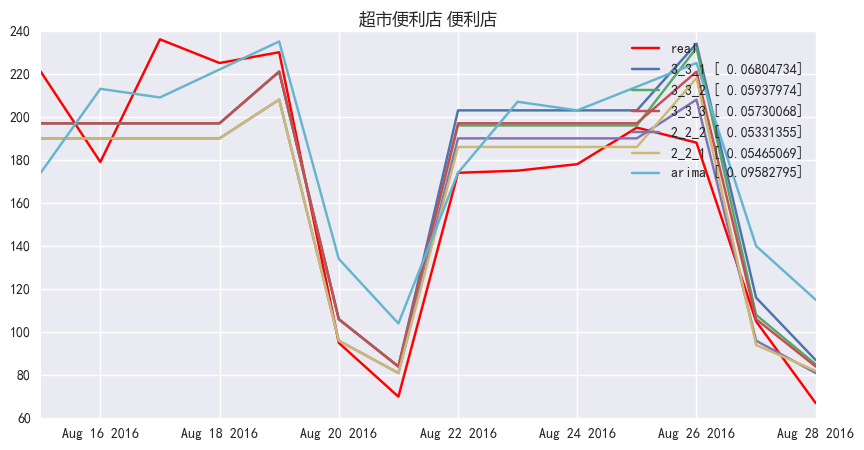

In [61]:
open_time = pd.to_datetime('2016-8-15')
end_time = pd.to_datetime('2016-8-28')
shop_id = 23
plotShopPayCounts(shop_id, [open_time, end_time], 
                  [datetime.timedelta(hours=0), datetime.timedelta(hours=23)], predict_dfs, mean_evaluation_dfs, names)

In [37]:
#3_3_1 \ 3_3_2 \ 2_2_2 \ 2_2_1 \ 3_3_3 \ arima

C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [57]:
combine_df = pd.DataFrame()
for i in range(len(names)):
    combine_df[names[i]] = mean_evaluation_dfs[i]['evaluation']

In [58]:
min_index_df = combine_df.idxmin(1)

In [60]:
min_index_df

id
1       arima
2       3_3_3
3       arima
4       3_3_1
5       3_3_1
6       3_3_1
7       3_3_3
8       3_3_2
9       arima
10      arima
11      3_3_1
12      3_3_3
13      3_3_1
14      3_3_1
15      3_3_1
16      arima
17      3_3_3
18      arima
19      2_2_2
20      3_3_1
21      arima
22      3_3_2
23      2_2_2
24      2_2_2
25      3_3_3
26      arima
27      arima
28      2_2_2
29      3_3_3
30      3_3_2
        ...  
1971    3_3_1
1972    2_2_2
1973    3_3_1
1974    3_3_1
1975    2_2_1
1976    2_2_2
1977    3_3_1
1978    3_3_1
1979    arima
1980    3_3_2
1981    3_3_1
1982    3_3_3
1983    arima
1984    3_3_1
1985    3_3_3
1986    3_3_3
1987    3_3_1
1988    3_3_2
1989    2_2_2
1990    2_2_1
1991    3_3_2
1992    3_3_2
1993    arima
1994    3_3_1
1995    3_3_1
1996    arima
1997    3_3_3
1998    3_3_1
1999    3_3_2
2000    arima
dtype: object

In [72]:
diff_df = diff.to_frame()

In [76]:
diff_df[diff_df['evaluation'] > 0.01].sort_values('evaluation')

,evaluation
id,
1763,0.010038
1359,0.010065
456,0.010069
218,0.010130
1614,0.010182
902,0.010193
104,0.010193
1318,0.010199
1320,0.010261
